Exploratory data analysis (EDA) is a crucial component of data science which allows you to understand the basics of what your data looks like and what kinds of questions might be answered. For this task, we are going to clean, sanitise and explore our data. Using the movies dataset, complete the steps outlined in this notebook by writing code in the cells.

In [1]:
# Import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import ast, json

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load the movies dataset 
movies_df = pd.read_csv('movies.csv')

# showing example
movies_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


### Data Cleansing
#### Clean the data

Identify columns that are redundant or unnecessary. It is always easier to make your decisions based on data which is relevant and concise. Remove the following columns `['homepage', 'keywords', 'original_language', 'original_title', 'overview', 'production_companies', 'status', 'tagline']` from the data set as they will not be used in the analysis.

In [3]:
# list of columns to remove
columns_to_drop = ['homepage', 'keywords', 'original_language', 'original_title', 'overview', 'production_companies', 'status', 'tagline']
movies_df = movies_df.drop(columns=columns_to_drop)

# Checking to see if the columns have been removed
movies_df.head()

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,112.312950,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,43.926995,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",John Carter,6.1,2124


#### Remove any duplicate rows

In [4]:
# Removing the duplicate rows from the DataFrame
movies_df = movies_df.drop_duplicates()

# Reset the index after removing duplicates
movies_df.reset_index(drop=True, inplace=True)

#### Remove rows with missing data 

Some movies in the database have zero budget or zero revenue which implies that their values have not been recorded or some information is missing. Discard such entries from the dataframe.

In [5]:
# Remove rows with zero budget and zero revenue
movies_df = movies_df[(movies_df['budget'] != 0) & (movies_df['revenue'] != 0)]

# Reset the index after removing rows
movies_df.reset_index(drop=True, inplace=True)

#### Change data types
To manipulate the columns easily, it is important that we make use of the python objects. Change the release date column into `DateTime` format and extract the year from the date. This will help us in analysing yearly data.

In [6]:
# Change the release_date column to DateTime
movies_df['release_date'] = pd.to_datetime(movies_df['release_date'])

# Get the release year from the release_date column
movies_df['release_year'] = movies_df['release_date'].dt.year

# Display updated DataFrame
movies_df.head()

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,release_year
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Avatar,7.2,11800,2009
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Pirates of the Caribbean: At World's End,6.9,4500,2007
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Spectre,6.3,4466,2015
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,112.312950,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Dark Knight Rises,7.6,9106,2012
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,43.926995,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",John Carter,6.1,2124,2012


Change budget and revenue columns to a integer data type using numpy’s `int64` method.

In [7]:
# Change 'budget' and 'revenue' columns to int64 data type
movies_df['budget'] = movies_df['budget'].astype(np.int64)
movies_df['revenue'] = movies_df['revenue'].astype(np.int64)

# # Display updated DataFrame data types
movies_df.dtypes

budget                           int64
genres                          object
id                               int64
popularity                     float64
production_countries            object
release_date            datetime64[ns]
revenue                          int64
runtime                        float64
spoken_languages                object
title                           object
vote_average                   float64
vote_count                       int64
release_year                     int64
dtype: object

On checking the dataset, we see that `genres`, `production_countries`, `spoken_languages` are in the JSON format which will make it difficult to manipulate the dataframe. The `parse_col_json function` flattens these columns into a format that can be easily interpreted.

In [8]:
# Convert from JSON format to a list of strings
def parse_col_json(df, column, key):
    """
    Args:
        df: DataFrame
            the DataFrame containing the column to be processed.
        column: string
            name of the column to be processed.
        key: string
            name of the dictionary key which needs to be extracted
    """
    for index, i in zip(df.index, df[column].apply(json.loads)):
        list1 = []
        for j in range(len(i)):
            list1.append(i[j][key])
        df.loc[index, column] = str(list1)

# Flatten data in columns for movies_df
parse_col_json(movies_df, 'genres', 'name')
parse_col_json(movies_df, 'production_countries', 'name')
parse_col_json(movies_df, 'spoken_languages', 'name')

In [9]:
# Inspect flattened data
movies_df.sample(1)

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,release_year
303,100000000,"['Adventure', 'Comedy', 'Science Fiction']",18162,19.38841,['United States of America'],2009-06-05,68688831,102.0,['English'],Land of the Lost,5.3,381,2009


In [10]:
movies_df.head(5)

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,release_year
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,150.437577,"['United States of America', 'United Kingdom']",2009-12-10,2787965087,162.0,"['English', 'Español']",Avatar,7.2,11800,2009
1,300000000,"['Adventure', 'Fantasy', 'Action']",285,139.082615,['United States of America'],2007-05-19,961000000,169.0,['English'],Pirates of the Caribbean: At World's End,6.9,4500,2007
2,245000000,"['Action', 'Adventure', 'Crime']",206647,107.376788,"['United Kingdom', 'United States of America']",2015-10-26,880674609,148.0,"['Français', 'English', 'Español', 'Italiano',...",Spectre,6.3,4466,2015
3,250000000,"['Action', 'Crime', 'Drama', 'Thriller']",49026,112.312950,['United States of America'],2012-07-16,1084939099,165.0,['English'],The Dark Knight Rises,7.6,9106,2012
4,260000000,"['Action', 'Adventure', 'Science Fiction']",49529,43.926995,['United States of America'],2012-03-07,284139100,132.0,['English'],John Carter,6.1,2124,2012


### Finding Certain Genres
Locate all movies in the "Action" genre. 

In [11]:
# Create a dataframe with all the movies in the "Action" genre

# Filter movies with genre "Action"
action_movies = movies_df[movies_df['genres'].str.contains("Action")]

# Display the first few rows of the "Action" genre movies DataFrame (Action in genres)
action_movies.head()

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,release_year
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,150.437577,"['United States of America', 'United Kingdom']",2009-12-10,2787965087,162.0,"['English', 'Español']",Avatar,7.2,11800,2009
1,300000000,"['Adventure', 'Fantasy', 'Action']",285,139.082615,['United States of America'],2007-05-19,961000000,169.0,['English'],Pirates of the Caribbean: At World's End,6.9,4500,2007
2,245000000,"['Action', 'Adventure', 'Crime']",206647,107.376788,"['United Kingdom', 'United States of America']",2015-10-26,880674609,148.0,"['Français', 'English', 'Español', 'Italiano',...",Spectre,6.3,4466,2015
3,250000000,"['Action', 'Crime', 'Drama', 'Thriller']",49026,112.312950,['United States of America'],2012-07-16,1084939099,165.0,['English'],The Dark Knight Rises,7.6,9106,2012
4,260000000,"['Action', 'Adventure', 'Science Fiction']",49529,43.926995,['United States of America'],2012-03-07,284139100,132.0,['English'],John Carter,6.1,2124,2012


### Now onto the exploration

#### Identify relationships between variables (features)

The main goal here is to identify and create relationships that can help you formulate ideas. We have defined questions to help you identify some relationships to explore.

#### Which are the 5 most expensive movies? 

How do the most expensive and cheapest movies compare? Exploring the most expensive movies highlights if some movies are worth the money spent on them based on their performance and revenue generated.

In [12]:
# Calculate profit for each movie (Revenue - Budget)
movies_df['profit'] = movies_df['revenue'] - movies_df['budget']

# Calculate profit percentage increase from budget
movies_df['profit_percentage'] = (movies_df['profit'] / movies_df['budget']) * 100

# Format the 'profit' column with commas
movies_df['profit'] = movies_df['profit'].apply(lambda x: f"${x:,.0f}")

# Format the 'profit_percentage' column with 2 decimal places and a percentage sign
movies_df['profit_percentage'] = movies_df['profit_percentage'].apply(lambda x: f"{x:.2f}%")

# Find the 5 most expensive movies
most_expensive_movies = movies_df.nlargest(5, 'budget')

# Display the DataFrame with the most expensive movies, including 'vote_average' and 'profit_percentage'
most_expensive_movies[['title', 'budget', 'revenue', 'profit', 'profit_percentage', 'vote_average']]

,title,budget,revenue,profit,profit_percentage,vote_average
17,Pirates of the Caribbean: On Stranger Tides,380000000,1045713802,"$665,713,802",175.19%,6.4
1,Pirates of the Caribbean: At World's End,300000000,961000000,"$661,000,000",220.33%,6.9
7,Avengers: Age of Ultron,280000000,1405403694,"$1,125,403,694",401.93%,7.3
10,Superman Returns,270000000,391081192,"$121,081,192",44.84%,5.4
4,John Carter,260000000,284139100,"$24,139,100",9.28%,6.1


In [13]:
# Find the cheapest movies with budgets greater than $100,000 (excludes possible incorrect data)
cheapest_movies = movies_df[(movies_df['budget'] > 100000)].nsmallest(5, 'budget')

# Display the DataFrame with the filtered cheapest movies, including 'vote_average' and 'vote_count'
cheapest_movies[['title', 'budget', 'revenue', 'profit', 'profit_percentage', 'vote_average']]

,title,budget,revenue,profit,profit_percentage,vote_average
2842,Night of the Living Dead,114000,30000000,"$29,886,000",26215.79%,7.5
3214,Your Sister's Sister,125000,3200000,"$3,075,000",2460.00%,6.5
3161,Open Water,130000,54667954,"$54,537,954",41952.27%,5.4
2726,Snow Flower and the Secret Fan,134005,1332231,"$1,198,226",894.17%,5.3
3210,Sweet Sweetback's Baadasssss Song,150000,15200000,"$15,050,000",10033.33%,4.6


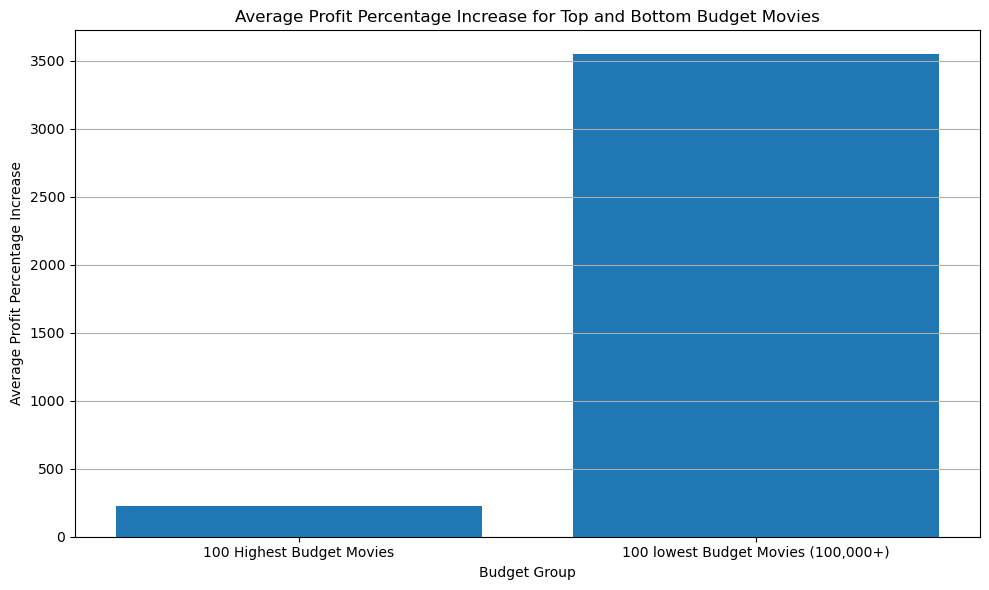

In [14]:
# Calculate profit for each movie (Revenue - Budget)
movies_df['profit'] = movies_df['revenue'] - movies_df['budget']

# Calculate profit percentage increase from budget
movies_df['profit_percentage'] = (movies_df['profit'] / movies_df['budget']) * 100

# Filter movies with budgets greater than $100,000
filtered_movies = movies_df[movies_df['budget'] > 100000]

# Find the top 5 highest budget movies and lowest 5 highest budget movies
top5_highest_budget = filtered_movies.nlargest(100, 'budget')
bottom5_highest_budget = filtered_movies.nsmallest(100, 'budget')

# Calculate the average profit percentage increase for the top and bottom movies
avg_profit_top5 = top5_highest_budget['profit_percentage'].mean()
avg_profit_bottom5 = bottom5_highest_budget['profit_percentage'].mean()

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.bar(['100 Highest Budget Movies', '100 lowest Budget Movies (100,000+)'], [avg_profit_top5, avg_profit_bottom5])
plt.xlabel('Budget Group')
plt.ylabel('Average Profit Percentage Increase')
plt.title('Average Profit Percentage Increase for Top and Bottom Budget Movies')
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

#### The graph shows that although highest budget movies generate more Revenue the profit percentage increase is actually higher for the lower budget movies

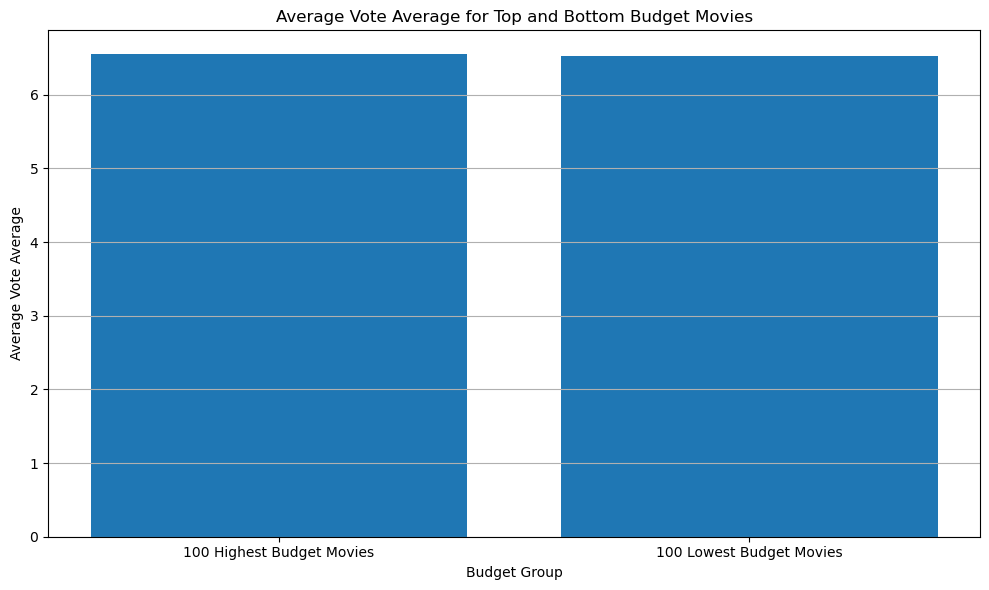

In [15]:
# Filter movies with budgets greater than $100,000
filtered_movies = movies_df[movies_df['budget'] > 100000]

# Find the top 100 highest budget movies and lowest 100 highest budget movies
top100_highest_budget = filtered_movies.nlargest(100, 'budget')
bottom100_highest_budget = filtered_movies.nsmallest(100, 'budget')

# Calculate the average 'vote_average' for the top and bottom movies
avg_vote_average_top100 = top100_highest_budget['vote_average'].mean()
avg_vote_average_bottom100 = bottom100_highest_budget['vote_average'].mean()

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.bar(['100 Highest Budget Movies', '100 Lowest Budget Movies'], [avg_vote_average_top100, avg_vote_average_bottom100])
plt.xlabel('Budget Group')
plt.ylabel('Average Vote Average')
plt.title('Average Vote Average for Top and Bottom Budget Movies')
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()


#### The graph shows that the average vote is about the same value for lower and higher budget movies

#### What are the top 5 most profitable movies? 

Compare the min and max profits. The comparison helps us identify the different approaches which failed and succeeded. Subtracting the budget from the revenue generated, will return the profit earned.

In [16]:
# Top 5 most profitable movies
top5_most_profitable = movies_df.nlargest(5, 'profit')

# Movie with maximum profit
max_profit_movie = movies_df.loc[movies_df['profit'].idxmax()]

# Calculate the maximum profit and budget
max_profit = max_profit_movie['profit']
max_budget = max_profit_movie['budget']

# Top 5 most profitable movies and the movie with max profit (printed)
print("Top 5 Most Profitable Movies:")
print(top5_most_profitable[['title', 'budget', 'revenue', 'profit']])
print(f"\nMovie with Maximum Profit: {max_profit_movie['title']}, Budget: {max_budget}, Profit: {max_profit}")

Top 5 Most Profitable Movies:
             title     budget     revenue      profit
0           Avatar  237000000  2787965087  2550965087
25         Titanic  200000000  1845034188  1645034188
28  Jurassic World  150000000  1513528810  1363528810
44       Furious 7  190000000  1506249360  1316249360
16    The Avengers  220000000  1519557910  1299557910

Movie with Maximum Profit: Avatar, Budget: 237000000, Profit: 2550965087


In [17]:
# Bottom 5 least profitable movies
bottom5_least_profitable = movies_df.nsmallest(5, 'profit')

# Movie with minimum profit
min_profit_movie = movies_df.loc[movies_df['profit'].idxmin()]

# Calculate the minimum profit and budget
min_profit = min_profit_movie['profit']
min_budget = min_profit_movie['budget']

# Bottom 5 least profitable movies and the movie with min profit
print("Bottom 5 Least Profitable Movies:")
print(bottom5_least_profitable[['title', 'budget', 'revenue', 'profit']])
print(f"\nMovie with Minimum Profit: {min_profit_movie['title']}, Budget: {min_budget}, Profit: {min_profit}")


Bottom 5 Least Profitable Movies:
                            title     budget   revenue     profit
13                The Lone Ranger  255000000  89289910 -165710090
333                     The Alamo  145000000  25819961 -119180039
139               Mars Needs Moms  150000000  38992758 -111007242
206              The 13th Warrior  160000000  61698899  -98301101
307  The Adventures of Pluto Nash  100000000   7103973  -92896027

Movie with Minimum Profit: The Lone Ranger, Budget: 255000000, Profit: -165710090


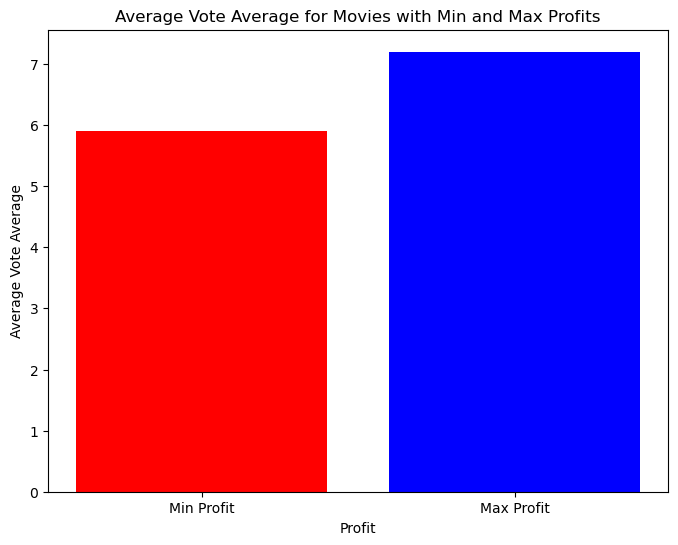

In [19]:
# Calculate the average vote_average for movies with minimum and maximum profits
min_profit_avg_vote = movies_df[movies_df['profit'] == min_profit]['vote_average'].mean()
max_profit_avg_vote = movies_df[movies_df['profit'] == max_profit]['vote_average'].mean()

# A bar graph to show the average vote_average for min and max profits
plt.figure(figsize=(8, 6))
plt.bar(['Min Profit', 'Max Profit'], [min_profit_avg_vote, max_profit_avg_vote], color=['red', 'blue'])
plt.xlabel('Profit')
plt.ylabel('Average Vote Average')
plt.title('Average Vote Average for Movies with Min and Max Profits')
plt.show()

#### The graph shows that movies that made less profit had a lower vote average

#### Find the most popular movies. 
Sort the dataframe based on the popularity column.

In [20]:
# Sorting dataframe by popularity in ascending order
most_popular_movies = movies_df.sort_values(by='popularity', ascending=False)
most_popular_movies.head()

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,release_year,profit,profit_percentage
525,74000000,"['Family', 'Animation', 'Adventure', 'Comedy']",211672,875.581305,['United States of America'],2015-06-17,1156730962,91.0,['English'],Minions,6.4,4571,2015,1082730962,1463.149949
94,165000000,"['Adventure', 'Drama', 'Science Fiction']",157336,724.247784,"['Canada', 'United States of America', 'United...",2014-11-05,675120017,169.0,['English'],Interstellar,8.1,10867,2014,510120017,309.163647
747,58000000,"['Action', 'Adventure', 'Comedy']",293660,514.569956,['United States of America'],2016-02-09,783112979,108.0,['English'],Deadpool,7.4,10995,2016,725112979,1250.194791
93,170000000,"['Action', 'Science Fiction', 'Adventure']",118340,481.098624,"['United Kingdom', 'United States of America']",2014-07-30,773328629,121.0,['English'],Guardians of the Galaxy,7.9,9742,2014,603328629,354.899194
126,150000000,"['Action', 'Adventure', 'Science Fiction', 'Th...",76341,434.278564,"['Australia', 'United States of America']",2015-05-13,378858340,120.0,['English'],Mad Max: Fury Road,7.2,9427,2015,228858340,152.572227


#### Find Movies which are rated above 7

In [21]:
# Movies above 7 rating
Movies_rated_above_7 = movies_df[(movies_df['vote_average'] > 7)]
Movies_rated_above_7.head(5)

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,release_year,profit,profit_percentage
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,150.437577,"['United States of America', 'United Kingdom']",2009-12-10,2787965087,162.0,"['English', 'Español']",Avatar,7.2,11800,2009,2550965087,1076.356577
3,250000000,"['Action', 'Crime', 'Drama', 'Thriller']",49026,112.312950,['United States of America'],2012-07-16,1084939099,165.0,['English'],The Dark Knight Rises,7.6,9106,2012,834939099,333.975640
6,260000000,"['Animation', 'Family']",38757,48.681969,['United States of America'],2010-11-24,591794936,100.0,['English'],Tangled,7.4,3330,2010,331794936,127.613437
7,280000000,"['Action', 'Adventure', 'Science Fiction']",99861,134.279229,['United States of America'],2015-04-22,1405403694,141.0,['English'],Avengers: Age of Ultron,7.3,6767,2015,1125403694,401.929891
8,250000000,"['Adventure', 'Fantasy', 'Family']",767,98.885637,"['United Kingdom', 'United States of America']",2009-07-07,933959197,153.0,['English'],Harry Potter and the Half-Blood Prince,7.4,5293,2009,683959197,273.583679


#### Most successful genres 
Create a bar plot explaining the frequency of movies in each genre.

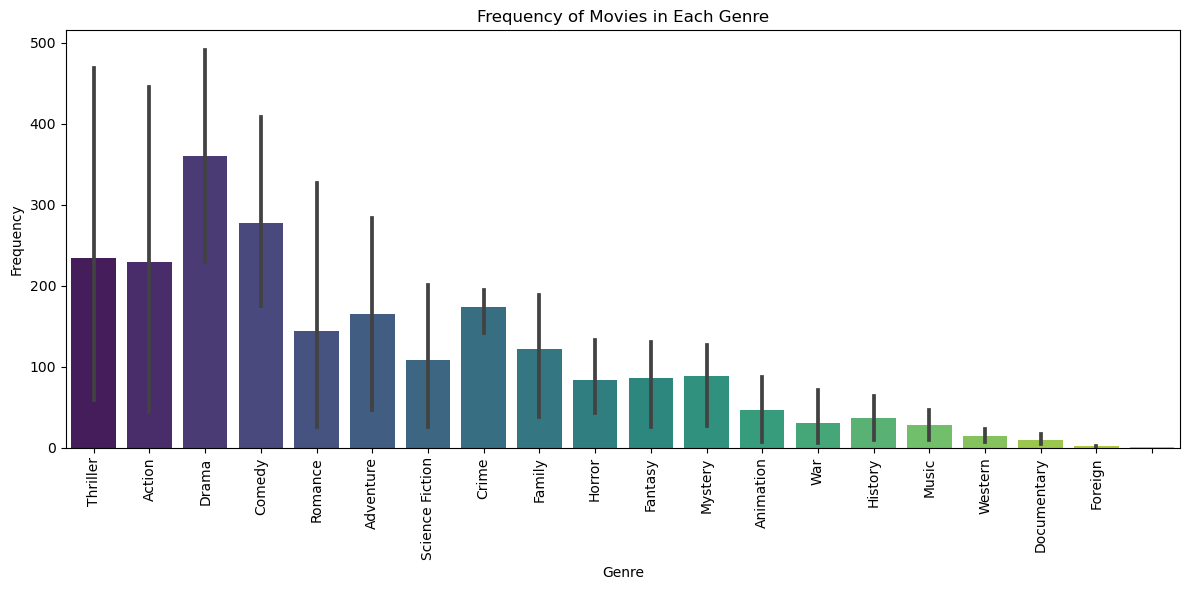

In [22]:
# Frequency count of each genre
genre_counts = movies_df['genres'].str.split(', ').explode().value_counts()

# Cleaning and Removing square brackets and single quotation marks from genre labels
genre_labels = [label.strip("[]'") for label in genre_counts.index]

# Bar plot with modified genre labels
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_labels, y=genre_counts.values, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.title('Frequency of Movies in Each Genre')
plt.tight_layout()
plt.show()

#### The graph shows that drama has the most frequency of movies and foreign has the least, this could be due to the fact that either drama movies are easier to make or are more in demand where as due to language barriers foreign movies may not be as in demand

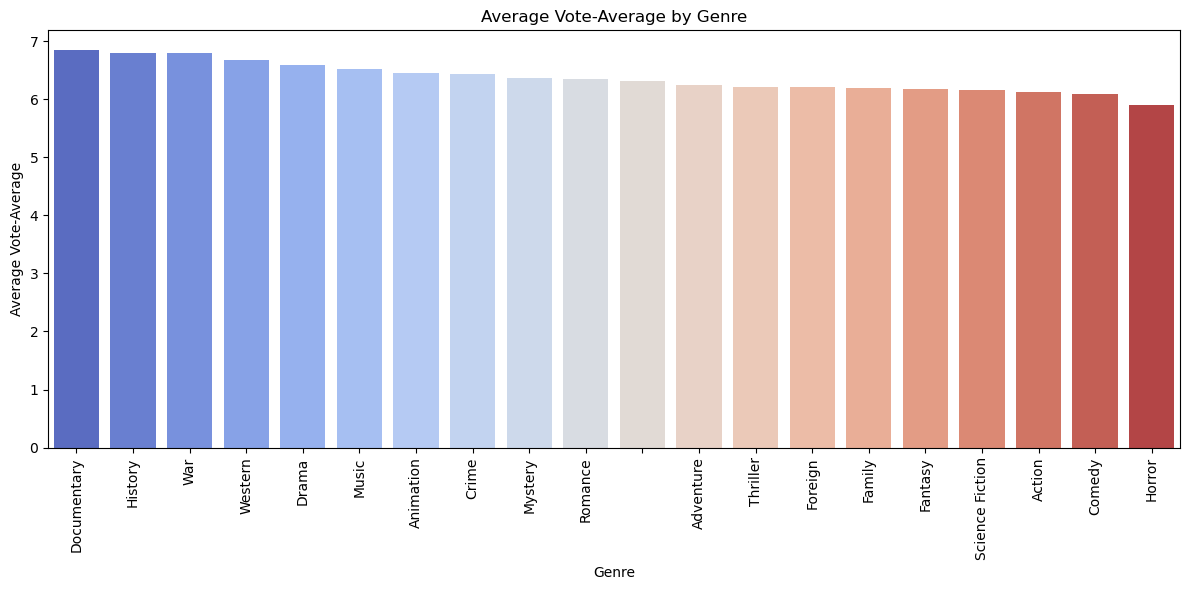

In [23]:
# Average vote_average for each genre
genre_vote_average = []

for genre in genre_labels:
    genre_movies = movies_df[movies_df['genres'].str.contains(genre)]
    genre_vote_average.append(genre_movies['vote_average'].mean())

# DataFrame to hold genre and average vote_average information
genre_vote_average_df = pd.DataFrame({'Genre': genre_labels, 'Average Vote Average': genre_vote_average})

# Sort the DataFrame by average vote_average in descending order
genre_vote_average_df = genre_vote_average_df.sort_values(by='Average Vote Average', ascending=False)

# Bar plot for average vote_average by genre
plt.figure(figsize=(12, 6))
sns.barplot(data=genre_vote_average_df, x='Genre', y='Average Vote Average', palette='coolwarm')
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Average Vote-Average')
plt.title('Average Vote-Average by Genre')
plt.tight_layout()
plt.show()

#### The Graph shows that Documentary, history and war genres have the highest ratings where as horror, comedy and action have the least.

#### a point to consider would be that comedy and action have a lot more movies created from any of the producers in the world where as documentaries, history and war are aimed and produced with a specific group of people that have interests in them. There may be less reviews but the reviews are by interested parties.

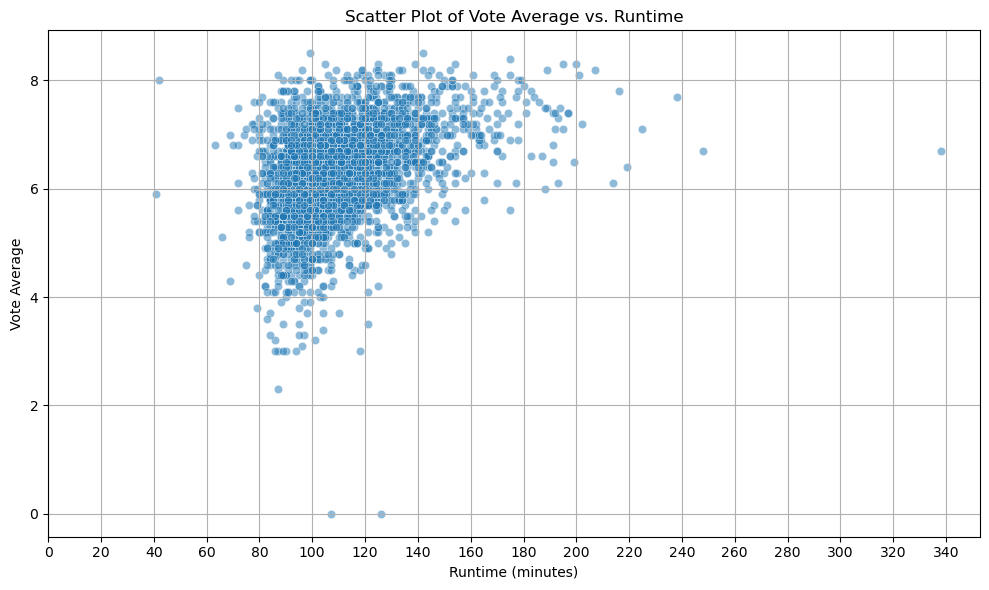

In [24]:
# Scatter plot of Vote average and runtime
plt.figure(figsize=(10, 6))
sns.scatterplot(data=movies_df, x='runtime', y='vote_average', alpha=0.5)

# Labels and title
plt.xlabel('Runtime (minutes)')
plt.ylabel('Vote Average')
plt.title('Scatter Plot of Vote Average vs. Runtime')

# X-axis to show values every 20 minutes
plt.xticks(range(0, int(movies_df['runtime'].max()) + 20, 20))

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

#### The graph shows that as movies increase in runtime, less vote averages are low
#### most movies are between 80 - 140 minutes, the movies thereafter are much less but maintain higher voting averages

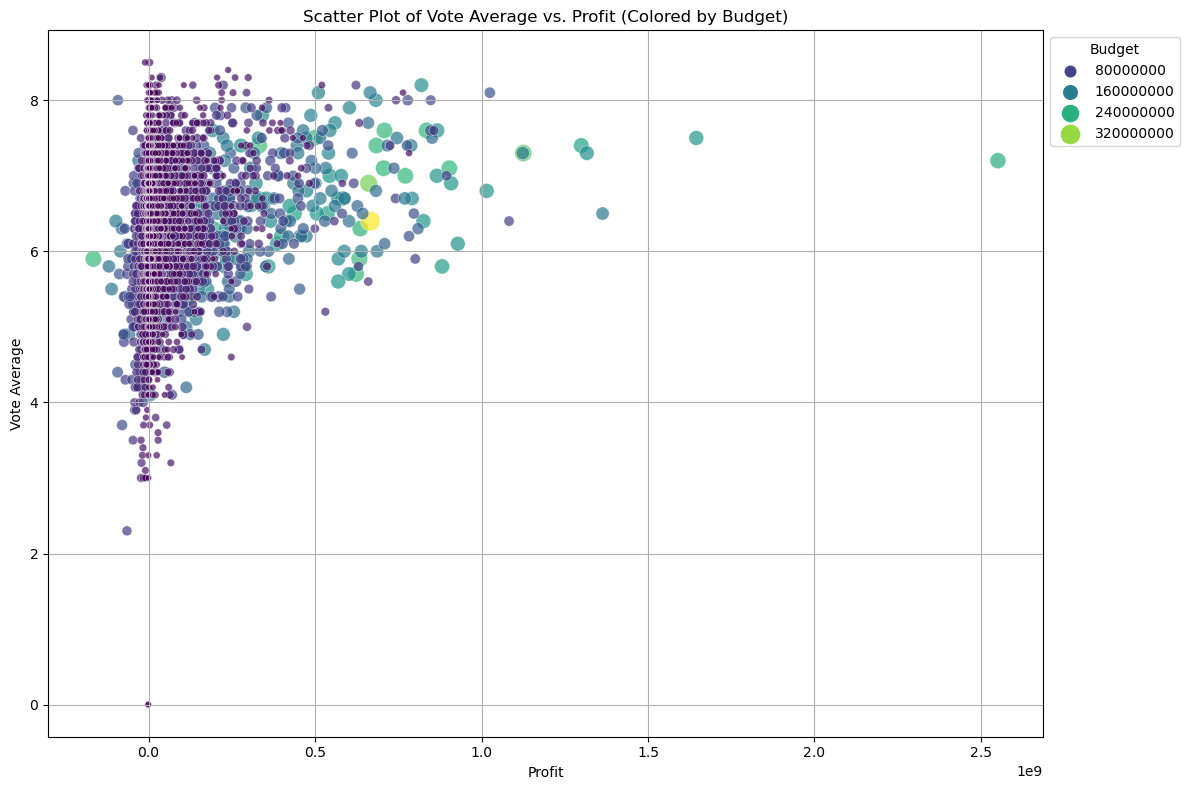

In [25]:
# Scatter plot
plt.figure(figsize=(12, 8))

# Use 'vote_average' on the y-axis
sns.scatterplot(data=movies_df, x='profit', y='vote_average', hue='budget', size='budget', sizes=(20, 200), alpha=0.7, palette='viridis')

# Labels and title
plt.xlabel('Profit')
plt.ylabel('Vote Average')
plt.title('Scatter Plot of Vote Average vs. Profit (Colored by Budget)')

# legend code
legend = plt.legend(title='Budget', loc='upper left', bbox_to_anchor=(1, 1))
legend.set_title('Budget')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

#### The graph shows the higher the budget, the more stable the vote average the more profit is made but less movies are created with higher budgets